In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading image
image1 = cv2.imread('image1.jpg')

scale_factor = 1.5

# Resize images with different interpolations
image2 = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
image3 = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)
image4 = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

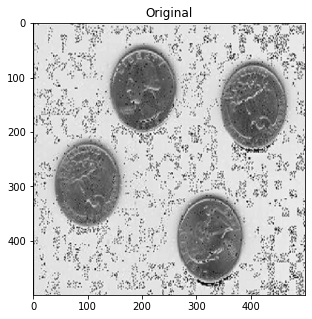

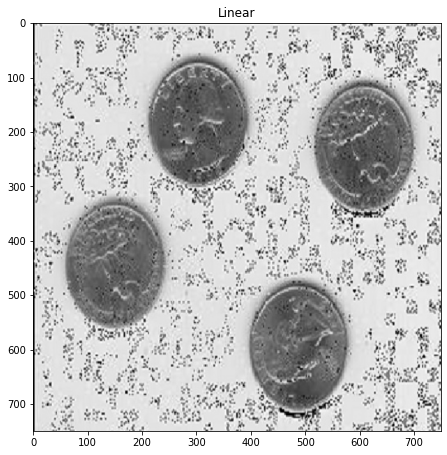

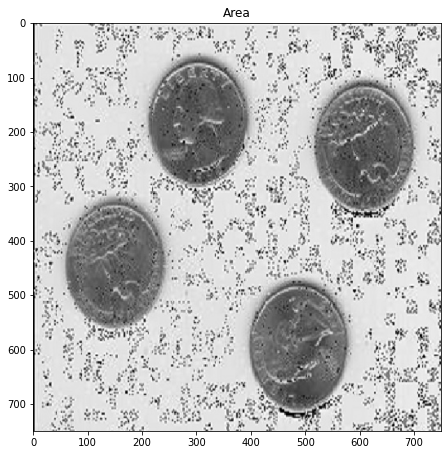

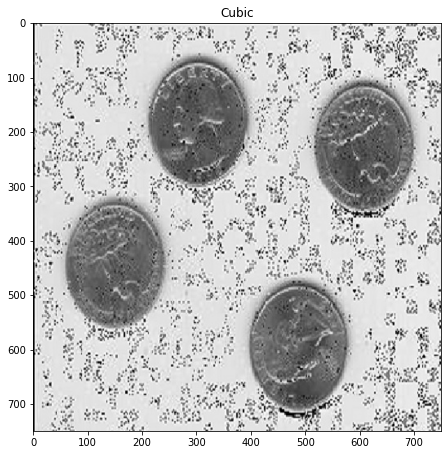

In [72]:
# Show them
images = [image1, image2, image3, image4]
Titles = ["Original", "Linear", "Area", "Cubic"]

for i in range(4):
    plt.figure(figsize=(images[i].shape[0]/100,images[i].shape[1]/100))
    plt.title(Titles[i])
    plt.imshow(images[i])
plt.show()
 


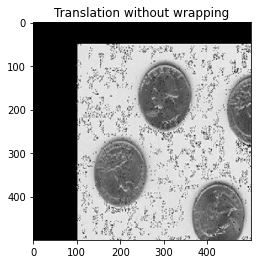

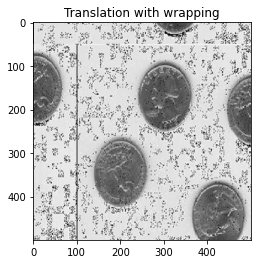

In [103]:
# Choosing how much we want to shift
tx = 100
ty = 50

# Translation without wrapping
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image_no_wrap = cv2.warpAffine(image1, translation_matrix, (image1.shape[1], image1.shape[0]))


# Translation with wrapping
translated_image_wrap = translated_image_no_wrap.copy().copy()
translated_image_wrap[:, :100] = image1[:, image1.shape[1]-100:]
translated_image_wrap[:50, :] = image1[image1.shape[0]-50:, :]

# Plot translated images
plt.imshow(cv2.cvtColor(translated_image_no_wrap, cv2.COLOR_BGR2RGB))
plt.title('Translation without wrapping')
plt.show()


plt.imshow(cv2.cvtColor(translated_image_wrap, cv2.COLOR_BGR2RGB))
plt.title('Translation with wrapping')

plt.show()

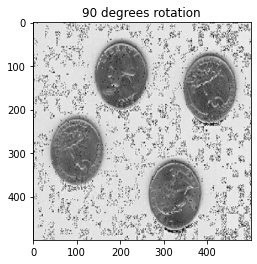

In [104]:
# Rotate the image 90 degrees
rotated_image = cv2.rotate(image1, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('90 degrees rotation')

plt.show()

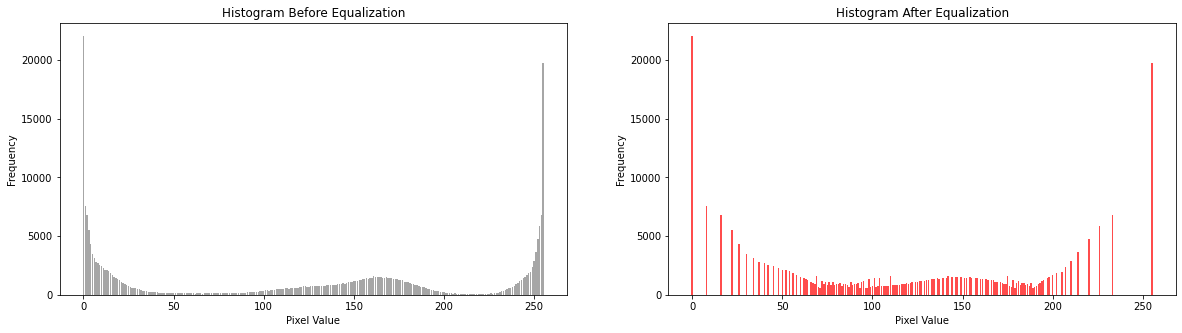

In [116]:
# Open image
image = cv2.imread('image2.jpg')
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Calculate histogram before equalization 
hist_before = cv2.calcHist([image2],[0],None,[256],[0,256])

# Apply histogram equalization
equ = cv2.equalizeHist(image2)

# Calculate histogram after equalization
hist_after = cv2.calcHist([equ],[0],None,[256],[0,256])

# Plot histograms
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(np.arange(256), hist_before.flatten(), color='gray', alpha=0.7)
plt.title('Histogram Before Equalization')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.bar(np.arange(256), hist_after.flatten(), color='r', alpha=0.7)
plt.title('Histogram After Equalization')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


plt.show()

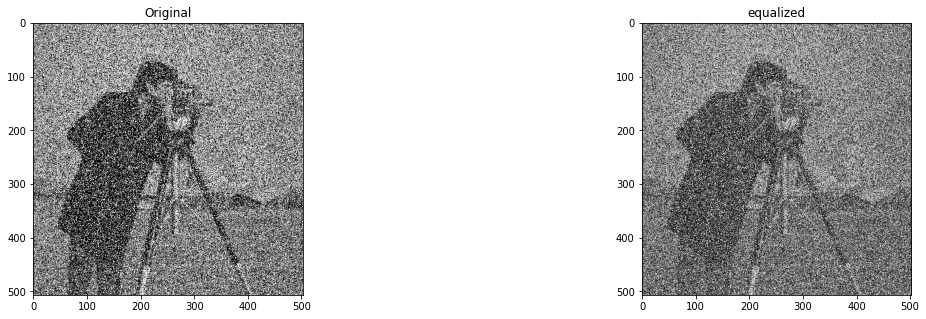

In [125]:
# Plot original image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image)

# Plot image after histogram equalization
plt.subplot(1,2,2)
plt.title('equalized')
plt.imshow(equ, cmap='gray')
plt.show()

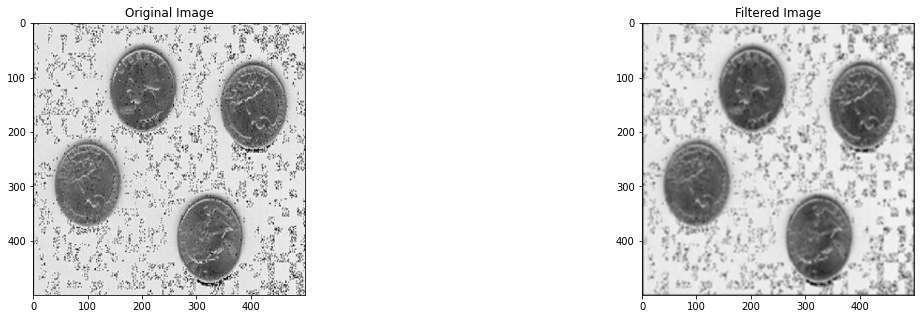

In [135]:
from scipy import ndimage

# Apply average filtering using a 2d convolution (a normalized all 1 array)

image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
k = np.ones((5, 5)) * (1/25)
filtered_image = ndimage.convolve(image, k, mode='constant', cval=0.0)

# Plot original image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# Plot image after mean filtering
plt.subplot(1,2,2)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()

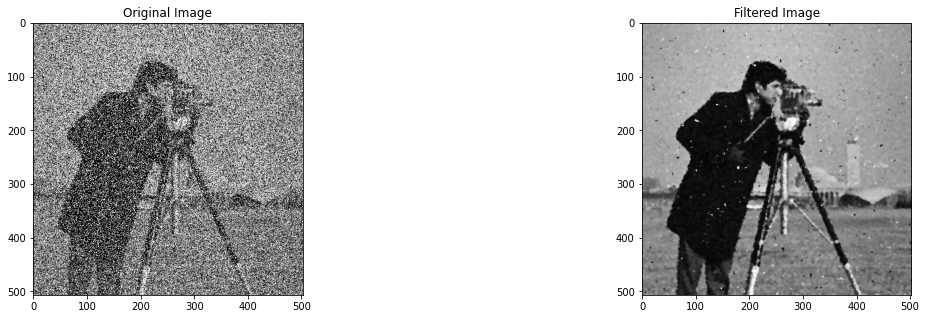

In [131]:
image = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)
filter_size = (5, 5)

# Apply median filter
filtered_image = ndimage.median_filter(image, size=filter_size)

# Plot original image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# Plot image after median filtering
plt.subplot(1,2,2)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()

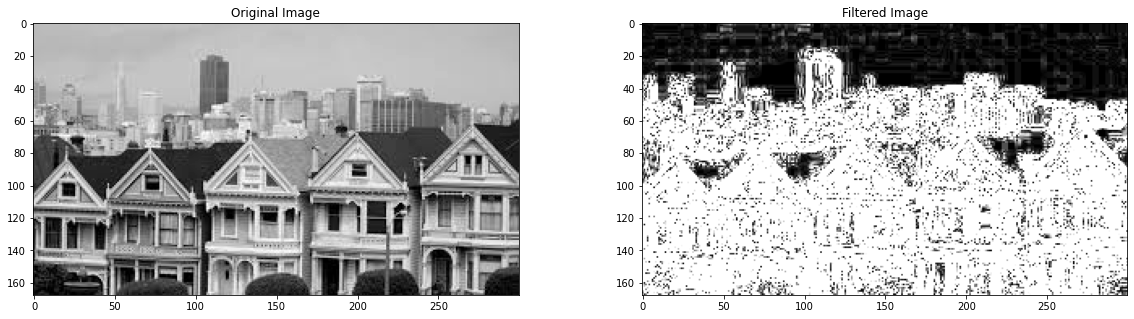

In [4]:
image = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)
kernel_size = 5
# Apply laplacian filtering
dst = cv2.Laplacian(image, cv2.CV_16S, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)

# Plot original image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# Plot image after laplacian filtering
plt.subplot(1,2,2)
plt.title('Filtered Image')
plt.imshow(abs_dst, cmap='gray')
plt.show()

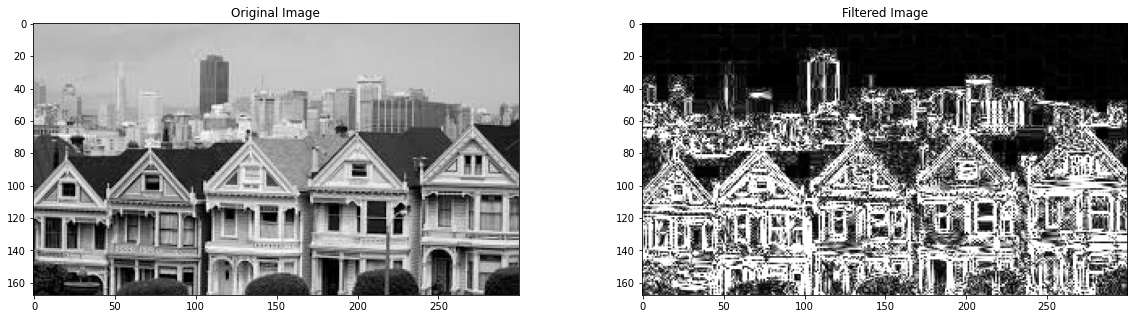

In [6]:
image = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)
kernel_size = 3
# Apply laplacian filtering
dst = cv2.Laplacian(image, cv2.CV_16S, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)

# Plot original image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# Plot image after laplacian filtering
plt.subplot(1,2,2)
plt.title('Filtered Image')
plt.imshow(abs_dst, cmap='gray')
plt.show()

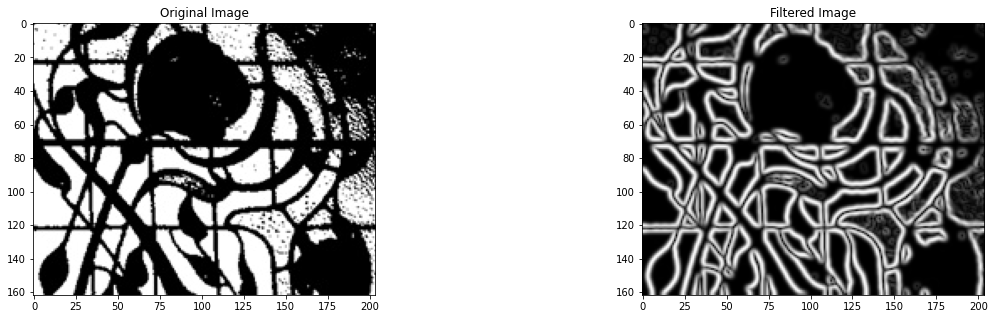

In [7]:
image = cv2.imread('image4.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=7)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=7)

# Combine the results
filtered_image = cv2.magnitude(sobelx, sobely)

# Plot original image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# Plot image after sobel filtering
plt.subplot(1,2,2)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()